# Drug consumption analysis

# The topic is trying to understand the profile of drug users in terms of demography and pychological traits.

"""

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. 

All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

"""

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database specified by the db_file
    
    :param db_file: database file
    :return: the Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
database = "Y:/BTS/Data Science Foundation-Course/Homework/Drug_consumption.db"

conn = create_connection(database)

N=1885
query = "SELECT * FROM Main LIMIT {}".format(N)
df = pd.read_sql_query(query, conn)

conn.close()

df.head()

,ID,AGE,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
AGE          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

# Create a new colomn Drug_user_type

- 0 means if the user have never used amphetamines, amyl nitrite, benzodiazepine, cannabis, cocaine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, Semeron and VSA.

- 1 means the last time the user used the following drugs is more than a month (amphetamines, amyl nitrite, benzodiazepine, cannabis, cocaine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, Semeron and VSA).

- 2 means the last time the user used the following drugs is less than a month (amphetamines, amyl nitrite, benzodiazepine, cannabis, cocaine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, Semeron and VSA).


In [5]:
df=df.replace('CL0',0)

In [6]:
df=df.replace(['CL1','CL2','CL3'],1)

In [7]:
df=df.replace(['CL4','CL5','CL6'],2)

In [8]:
df.loc[(df['Amphet']==0) & (df['Amyl']==0) & (df['Benzos']==0) & (df['Cannabis']==0) & (df['Coke']==0) & (df['Crack']==0) & (df['Ecstasy']==0) & (df['Heroin']==0) & (df['Ketamine']==0) & (df['Legalh']==0) & (df['LSD']==0) & (df['Meth']==0) & (df['Mushrooms']==0) & (df['Semer']==0) & (df['VSA']==0), 'Drug_user_type'] = 0

In [9]:
df.loc[(df['Amphet']|df['Amyl']|df['Benzos']|df['Cannabis']|df['Coke']|df['Crack']|df['Ecstasy']|df['Heroin']|df['Ketamine']|df['Legalh']|df['LSD']|df['Meth']|df['Mushrooms']|df['Semer']|df['VSA'])==1, 'Drug_user_type'] = 1

In [10]:
df.loc[(df['Amphet']|df['Amyl']|df['Benzos']|df['Cannabis']|df['Coke']|df['Crack']|df['Ecstasy']|df['Heroin']|df['Ketamine']|df['Legalh']|df['LSD']|df['Meth']|df['Mushrooms']|df['Semer']|df['VSA'])>1, 'Drug_user_type'] = 2

# Questions

# 1.	What is the distrubution of drug consumption in the sample?

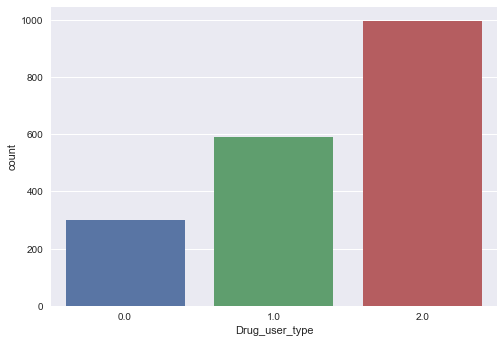

In [11]:
sns.countplot(df['Drug_user_type'])
plt.show()

# 2.	How is drug consumption relate to age?

### Age categories

1. -0.95197 18-24 
2. -0.07854 25-34 
3. 0.49788 35-44 
4. 1.09449 45-54 
5. 1.82213 55-64
6. 2.59171 65+


In [12]:
df[["Drug_user_type","AGE"]].groupby(['Drug_user_type'],as_index=False).mean()

,Drug_user_type,AGE
0,0.0,0.485614
1,1.0,0.382003
2,2.0,-0.306567


# 3.	How is drug consumption relate to gender?

In [13]:
df['Gender']=df['Gender'].replace(-0.48246,'Male')
df['Gender']=df['Gender'].replace(0.48246,'Female')

In [14]:
df[["Drug_user_type","Gender"]].groupby(['Gender'],as_index=False).count()

,Gender,Drug_user_type
0,Female,942
1,Male,943


# 4.	How is drug consumption relate to education?

In [15]:
df.loc[df['Education']<-0.6, 'Edugroup'] = "No degree"
df.loc[(df['Education']>-0.6) & (df['Education']<1), 'Edugroup'] = "University degree"
df.loc[df['Education']>1, 'Edugroup'] = "Master degree+"

In [16]:
df[["Drug_user_type","Edugroup"]].groupby(['Edugroup'],as_index=False).count()

,Edugroup,Drug_user_type
0,Master degree+,372
1,No degree,763
2,University degree,750


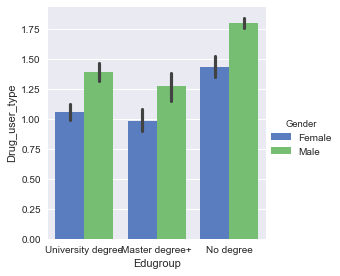

In [17]:
plt.figsize=([15,15])
sns.factorplot("Edugroup","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# Major finding 1: 

# Overall there are more male than female that are taking drugs. Interestingly the most frequent drug users are the people without university degrees, while the difference between university degrees oven higher educations, it did not show a big difference. 

# 5.	How is drug consumption relate to country?

In [18]:
df['Country']=df['Country'].replace(-0.09765,'Australia')
df['Country']=df['Country'].replace(0.24923,'Canada')
df['Country']=df['Country'].replace(-0.46841,'New Zealand')
df['Country']=df['Country'].replace(-0.28519,'Other')
df['Country']=df['Country'].replace(0.21128,'Ireland')
df['Country']=df['Country'].replace(0.96082,'UK')
df['Country']=df['Country'].replace(-0.57009,'USA')

In [19]:
df[["Drug_user_type","Country"]].groupby(['Country'],as_index=False).count()

,Country,Drug_user_type
0,Australia,54
1,Canada,87
2,Ireland,20
3,New Zealand,5
4,Other,118
5,UK,1044
6,USA,557


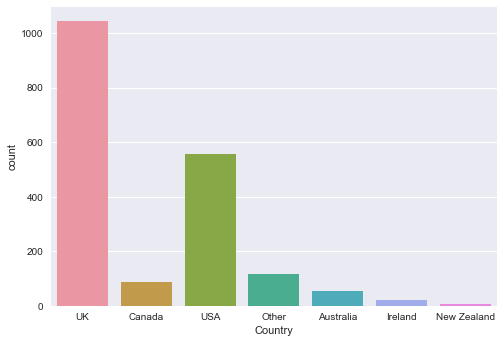

In [20]:
sns.countplot(df['Country'])
plt.show()

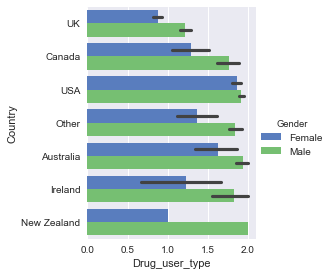

In [21]:
sns.factorplot("Drug_user_type","Country","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# Major finding 2: 

# In most countries, there are more male than female using drugs, but in USA, the amount of female is only slightly less than male.

# 6.	How is drug consumption relate to Neuroticism?

In [22]:
df.loc[df['Nscore']<0, 'Neuroticism'] = "emotional stable"
df.loc[df['Nscore']>=0, 'Neuroticism'] = "emotional instable"

In [23]:
df[["Drug_user_type","Neuroticism"]].groupby(['Neuroticism'],as_index=False).count()

,Neuroticism,Drug_user_type
0,emotional instable,947
1,emotional stable,938


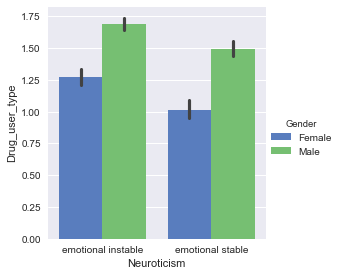

In [24]:
sns.factorplot("Neuroticism","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 7.	How is drug consumption relate to Neuroticism,  if age plays a role here?

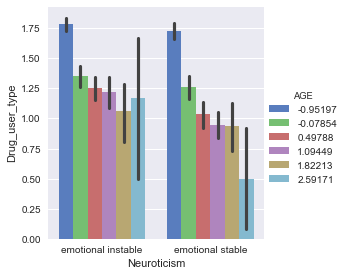

In [25]:
sns.factorplot("Neuroticism","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# Major finding 3: 

# For the people below 25, no matter if they are emotionally stable, they have the highest consumption of drugs. In contract, for people who are older than 65, there are more than doubled drug consumer when they are emtionally instable.

# 8.	How is drug consumption relate to Extraversion?

In [26]:
df.loc[df['Escore']<0, 'Extraversion'] = "Intraverted"
df.loc[df['Escore']>=0, 'Extraversion'] = "Extraverted"

In [27]:
df[["Drug_user_type","Extraversion"]].groupby(['Extraversion'],as_index=False).count()

,Extraversion,Drug_user_type
0,Extraverted,1005
1,Intraverted,880


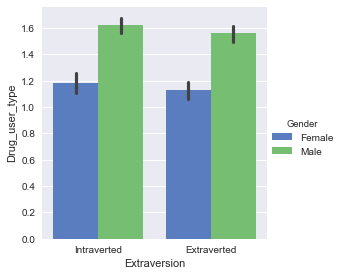

In [28]:
sns.factorplot("Extraversion","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 9.	How is drug consumption relate to Extraversion,  if age plays a role here?

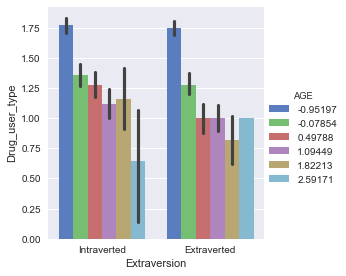

In [29]:
sns.factorplot("Extraversion","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 10.	How is drug consumption relate to Openness to experience?

In [30]:
df.loc[df['Oscore']<0, 'Openness'] = "Close"
df.loc[df['Oscore']>=0, 'Openness'] = "Open"

In [31]:
df[["Drug_user_type","Openness"]].groupby(['Openness'],as_index=False).count()

,Openness,Drug_user_type
0,Close,995
1,Open,890


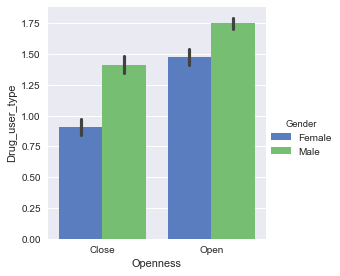

In [32]:
sns.factorplot("Openness","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 11.	How is drug consumption relate to Openness,  if age plays a role here?

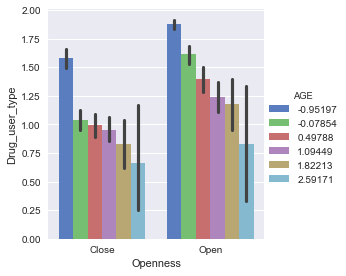

In [33]:
sns.factorplot("Openness","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 12.	How is drug consumption relate to Agreeableness?

In [34]:
df.loc[df['Ascore']<0, 'Agreeableness'] = "Not agreeable"
df.loc[df['Ascore']>=0, 'Agreeableness'] = "Agreeable"

In [35]:
df[["Drug_user_type","Agreeableness"]].groupby(['Agreeableness'],as_index=False).count()

,Agreeableness,Drug_user_type
0,Agreeable,903
1,Not agreeable,982


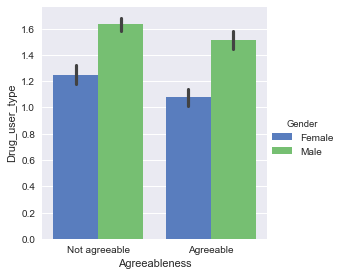

In [36]:
sns.factorplot("Agreeableness","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 13.	How is drug consumption relate to Agreeableness,  if age plays a role here?

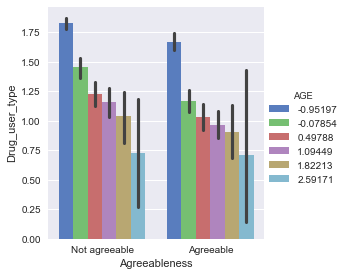

In [37]:
sns.factorplot("Agreeableness","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 14.	How is drug consumption relate to Conscientiousness?

In [38]:
df.loc[df['Cscore']<0, 'Conscientiousness'] = "Not conscientious"
df.loc[df['Cscore']>=0, 'Conscientiousness'] = "Conscientious"

In [39]:
df[["Drug_user_type","Conscientiousness"]].groupby(['Conscientiousness'],as_index=False).count()

,Conscientiousness,Drug_user_type
0,Conscientious,895
1,Not conscientious,990


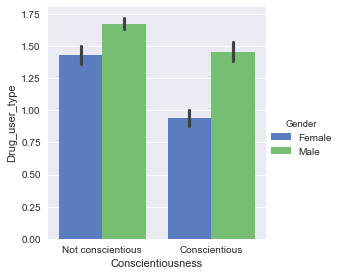

In [40]:
sns.factorplot("Conscientiousness","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 15.	How is drug consumption relate to Conscientiousness,  if age plays a role here?

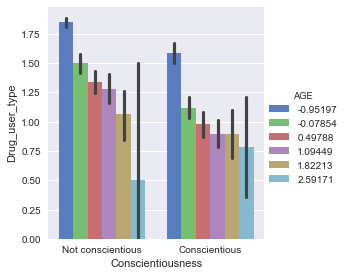

In [41]:
sns.factorplot("Conscientiousness","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# Major finding 4: 

# Interestingly for the people who are below 65, not conscientious personality leads to higher drug consumption, though for people who are older than 65, there is a reverse trend that more than doubled couscientious person are consuming drugs.

# 16.	How is drug consumption relate to impulsiveness?

In [42]:
df.loc[df['Impulsive']<0, 'impulsiveness'] = "Not impulsive"
df.loc[df['Impulsive']>=0, 'impulsiveness'] = "Impulsive"

In [43]:
df[["Drug_user_type","impulsiveness"]].groupby(['impulsiveness'],as_index=False).count()

,impulsiveness,Drug_user_type
0,Impulsive,927
1,Not impulsive,958


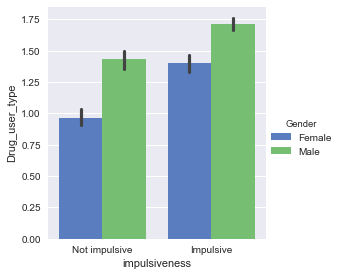

In [44]:
sns.factorplot("impulsiveness","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 17.	How is drug consumption relate to Impulsiveness,  if age plays a role here?

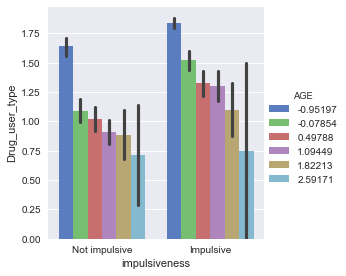

In [45]:
sns.factorplot("impulsiveness","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 18.	How is drug consumption relate to sensation seeing?

In [46]:
df.loc[df['SS']<0, 'sensation'] = "Not seeing sansation"
df.loc[df['SS']>=0, 'sensation'] = "Seeing sansation"

In [47]:
df[["Drug_user_type","sensation"]].groupby(['sensation'],as_index=False).count()

,sensation,Drug_user_type
0,Not seeing sansation,893
1,Seeing sansation,992


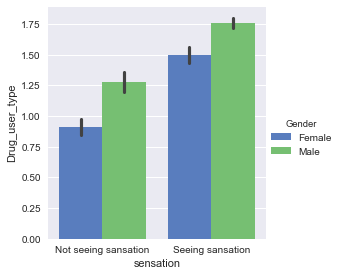

In [48]:
sns.factorplot("sensation","Drug_user_type","Gender",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 19.	How is drug consumption relate to sensation seeing,  if age plays a role here?

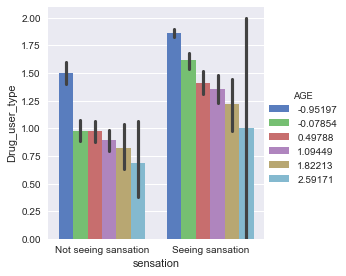

In [49]:
sns.factorplot("sensation","Drug_user_type","AGE",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# 20.	How is drug consumption relate to sensation seeing,  if country plays a role here?

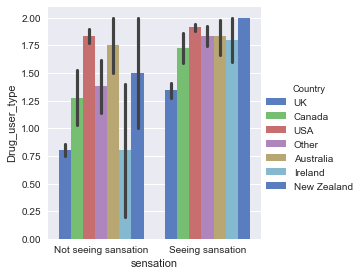

In [50]:
sns.factorplot("sensation","Drug_user_type","Country",data=df, kind="bar", palette="muted",legend=True)
plt.show()

# Major finding 5: 

# Interestingly for the people in the US and Australia, sation seeing or not has almost no contrubiton to the drug consuption, but for people most other countries, especially in Ireland, people who seek sansation has much higher drug consumption.